# output of new marker files

## behavioral events for tasks A and B only:
1. cursor direction change
2. peak error

## how to run:
1. run all cells
2. import the markers (keep old markers!!) in BVA (see history templates)
3. for task B: separate conditions (i.e., occ./not occ.) with advanced boolean expressions

In [4]:
%matplotlib notebook
from functions_adaptive_movement import *

sbj_IDs = [f.name.split("_")[0] for f in os.scandir(path_behav) if f.is_dir()]

<IPython.core.display.Javascript object>


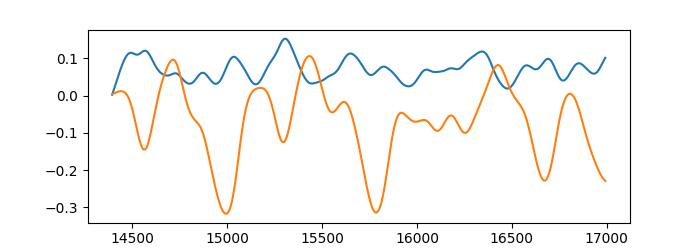

174
list index out of range
skipping Pilot038GC_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


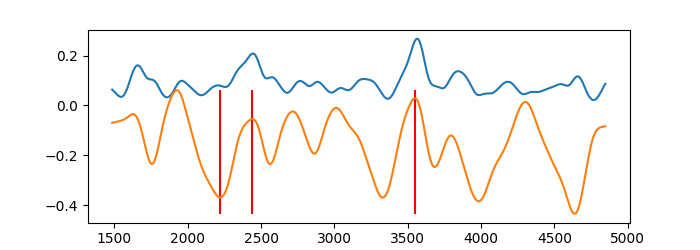

130
list index out of range
skipping Pilot09WM9_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


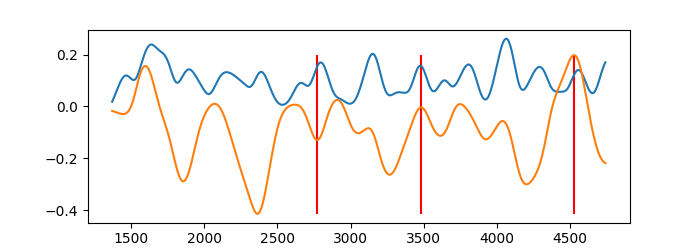

87
list index out of range
skipping Pilot5STJS_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


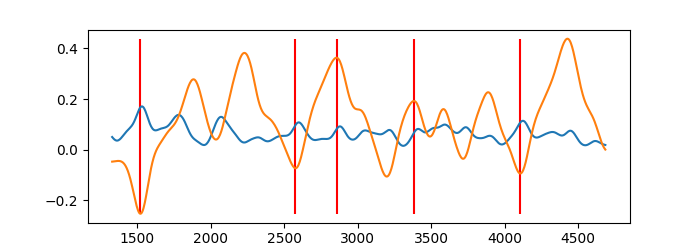

234
list index out of range
skipping Pilot607SE_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


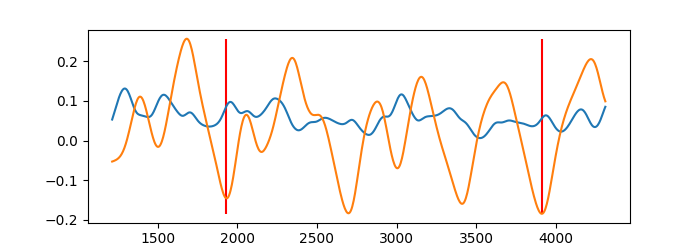

309
list index out of range
skipping Pilot69UUS_B
list index out of range
skipping PilotHBKTI_A
list index out of range
skipping PilotHBKTI_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


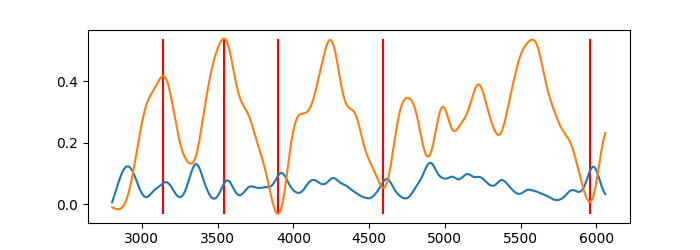

182
list index out of range
skipping PilotHGMKL_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


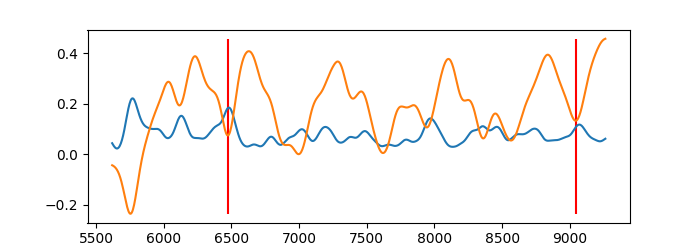

168
list index out of range
skipping PilotHVNAK_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


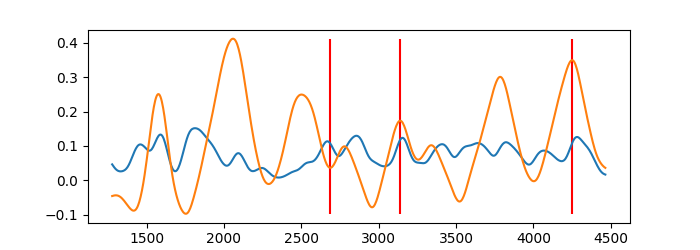

151
list index out of range
skipping PilotM0P1Q_B
list index out of range
skipping PilotOTQYX_A
list index out of range
skipping PilotOTQYX_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


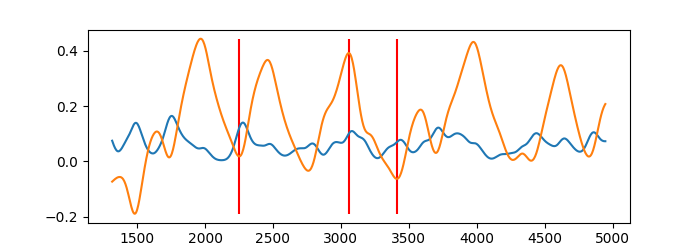

258
list index out of range
skipping PilotSGUNS_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


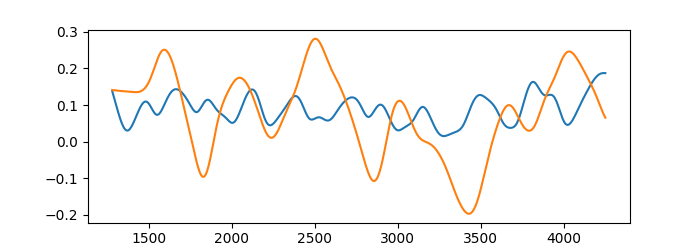

103
list index out of range
skipping PilotUDU06_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


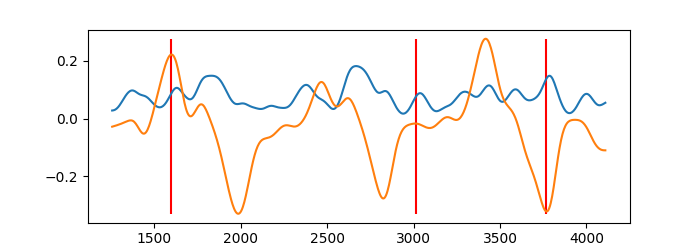

229
list index out of range
skipping PilotWLOYV_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


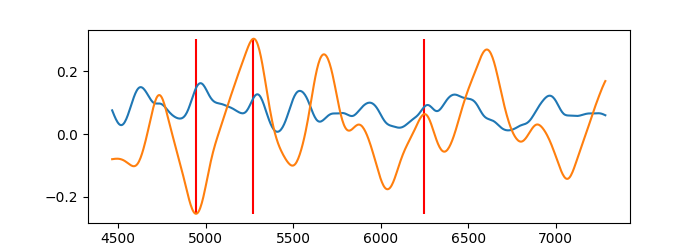

154
list index out of range
skipping PilotYFE0B_B


C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
for sbj_ID in sbj_IDs:
    for task in ["A","B"]:
        try:
            behavioral_events_to_EEG(sbj_ID, task, 30, debug=True)
        except Exception as e:
            print(e)
            print(f"skipping Pilot{sbj_ID}_{task}")
            continue

In [3]:
# integrative function
def behavioral_events_to_EEG(sbj_ID, task, tol, debug=False):
    # writes new marker file

    # 1. load the marker file
    df_marker = load_marker_file(sbj_ID, task)
    
    # 2. derive the start samples and trial durations
    start_trials_samp, dur_trials_in_samp = trial_sample_infos_from_marker_df(df_marker)
            
    # for all trials, read in the behavioral files
    behavioral_folders = [f for f in subdirs if f"{sbj_ID}" in f and f"_{task}" in f][0]
    
    behav_dims = ["error_abs", "purs-y"]
    all_EEG_samples = [[] for _ in range(len(behav_dims))]
    
    for trial_ind in range(len(dur_trials_in_samp)):
        behav_trial = load_trial(behavioral_folders, trial_ind + 1)
        dur_trial_samp   = dur_trials_in_samp[trial_ind]
        start_trial_samp = start_trials_samp[trial_ind]
        
        xyz = behavioral_events_in_EEG_format(
                behav_trial,
                behav_dims[0],
                dur_trial_samp,
                start_trial_samp,
                trial_ind,
                False
            )
        EEG_samples_trial_error = xyz[1]
        EEG_samples_trial_error_for_plot = xyz[0]

        xyz = behavioral_events_in_EEG_format(
                behav_trial,
                behav_dims[1],
                dur_trial_samp,
                start_trial_samp,
                trial_ind,
                False
            )
        EEG_samples_trial_behav = xyz[1]
        EEG_samples_trial_behav_for_plot = xyz[0]
        
        # looking for matches with some temporal tolerance
        EEG_samples_trial_match = []
        match_inds = []
        for i, samp in enumerate(EEG_samples_trial_behav):
            for samp_e in EEG_samples_trial_error:
                if samp in range(samp_e - tol, samp_e + tol + 1):
                    EEG_samples_trial_match.append(samp)
                    match_inds.append(i)
                    break
        EEG_samples_trial_match_for_plot = [s for i, s in enumerate(EEG_samples_trial_behav_for_plot) if i in match_inds]

        #EEG_samples_trial_match = [samp for samp in EEG_samples_trial_error if samp in EEG_samples_trial_behav]
        #EEG_samples_trial_match_for_plot = [samp for samp in EEG_samples_trial_error_for_plot if samp in EEG_samples_trial_behav_for_plot]

        # total debug plot (TODO: write in its own function)
        if trial_ind == 0:
            debug_plot_new(behav_trial, EEG_samples_trial_match_for_plot)

        # append to continuous list of all markers
        all_EEG_samples += EEG_samples_trial_match
        
    # bring into file format readable by BVA
    write_markers(42, all_EEG_samples, sbj_ID, task)

    print("==========================")
    print(len(all_EEG_samples))
    print("==========================")

In [3]:
for sbj_ID in sbj_IDs:
    for task in ["A","B"]:
        behavioral_events_to_EEG(sbj_ID, task, 50, debug=True)

TypeError: 'DataFrame' object is not callable

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [9]:
path_winning_against_adriana = Path(r"R:\AG-Beste-Studien\Emulation\04_data\behav\5STJS_A")

In [10]:
booya_df = pd.read_csv(path_winning_against_adriana/"5STJS_traj_purs_1.csv")
booya_df

,traj-x,traj-y,purs-x,purs-y,error,error_abs
0,0.000000,0.000000,0.000000,-0.016251,0.016251,0.016251
1,-0.003734,0.000153,-0.003734,-0.018082,0.018235,0.018235
2,-0.006899,0.003702,-0.006899,-0.018326,0.022028,0.022028
3,-0.009320,0.008863,-0.009320,-0.018814,0.027678,0.027678
4,-0.011259,0.014655,-0.011259,-0.019425,0.034080,0.034080
...,...,...,...,...,...,...
785,-0.758155,-0.048549,-0.758155,-0.214801,0.166252,0.166252
786,-0.758972,-0.041948,-0.758972,-0.216144,0.174196,0.174196
787,-0.759793,-0.035349,-0.759793,-0.216510,0.181161,0.181161
788,-0.760622,-0.028766,-0.760622,-0.216632,0.187867,0.187867


<IPython.core.display.Javascript object>


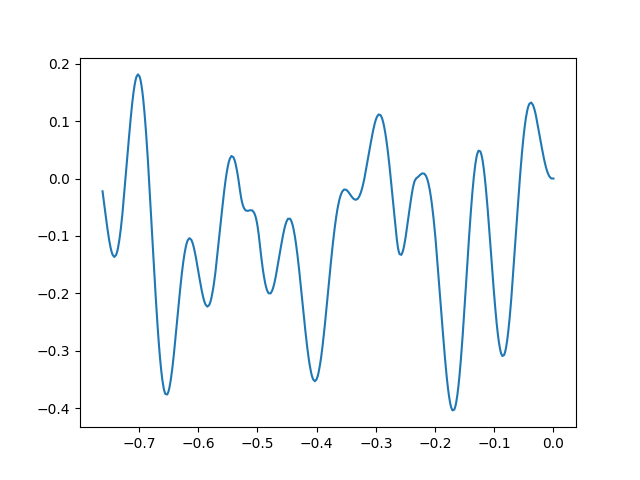

In [14]:
plt.figure()
plt.plot(booya_df["traj-x"], booya_df["traj-y"])